About Project

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import joblib
import warnings
warnings.filterwarnings("ignore")


imported libraries

# EDA

In [2]:
#load datafile
ds=pd.read_csv("census_income.csv")
ds

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Data Analysis & Visualization

In [3]:
print(ds.shape)
print('****************')
print(ds.columns)
print('****************')
print(ds.keys())


(32560, 15)
****************
Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')
****************
Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')


Dataset has total 32560 rows and 15 columns

In [4]:
ds.head() #top 5 rows of dataset

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
ds.tail() #bottom 5 rows of dataset

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Data Analsys & Visualization

In [6]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [7]:
#dropping column 'Unnamed'
#ds.drop('Unnamed: 0', axis=1, inplace=True)
#ds.columns

In [8]:
ds.dtypes #check type of data

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

As we can find here that dataset object values so we have to convert object values into int LabelEncoder

In [9]:
ds.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In this dataset there is no null value

In [10]:
ds['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [11]:
ds.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

<AxesSubplot:xlabel='Income', ylabel='count'>

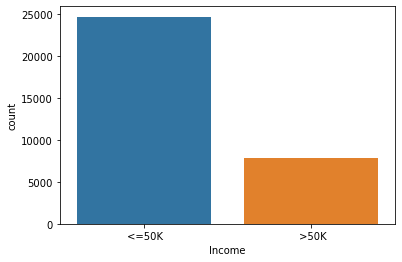

In [12]:
sns.countplot(ds.Income)

As we can see that most of person income in <=50k

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


<AxesSubplot:xlabel='Marital_status', ylabel='count'>

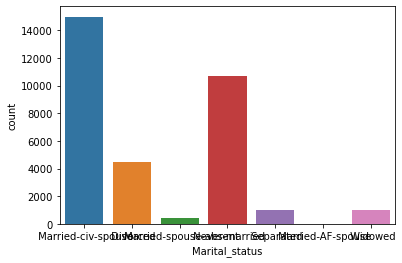

In [13]:
print(ds.Marital_status.value_counts())
sns.countplot(ds.Marital_status)

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


<AxesSubplot:xlabel='Occupation', ylabel='count'>

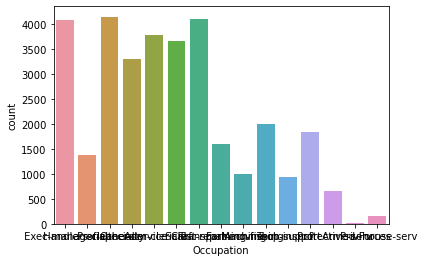

In [14]:
print(ds.Occupation.value_counts())
sns.countplot(ds.Occupation)

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


<AxesSubplot:xlabel='Relationship', ylabel='count'>

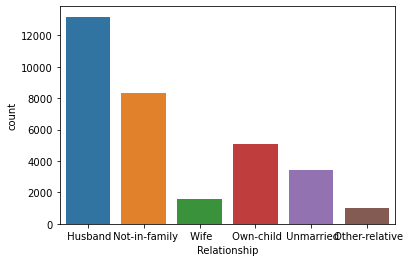

In [15]:
print(ds.Relationship.value_counts())
sns.countplot(ds.Relationship)

 Male      21789
 Female    10771
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

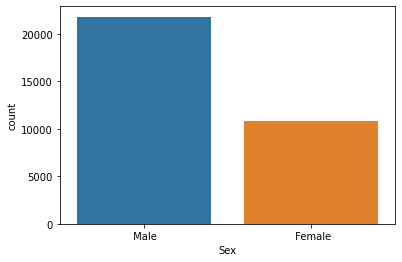

In [16]:
print(ds.Sex.value_counts())
sns.countplot(ds.Sex)

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: Capital_gain, Length: 119, dtype: int64


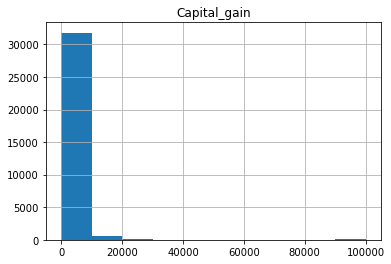

In [17]:
print(ds.Capital_gain.value_counts())
ds["Capital_gain"].hist(grid=True)
plt.title("Capital_gain")
plt.show()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: Capital_loss, Length: 92, dtype: int64


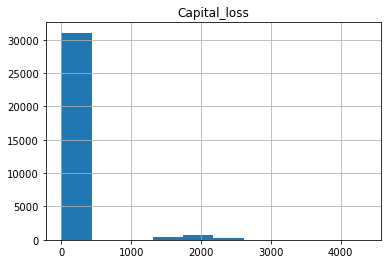

In [18]:
print(ds.Capital_loss.value_counts())
ds["Capital_loss"].hist(grid=True)
plt.title("Capital_loss")
plt.show()

<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

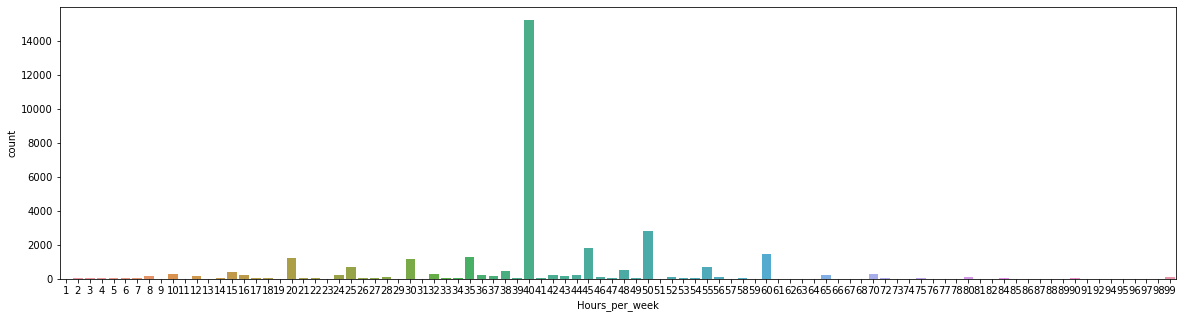

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(ds.Hours_per_week)

# Bivariate analysis

In [20]:
#lets check income accourding to other columns


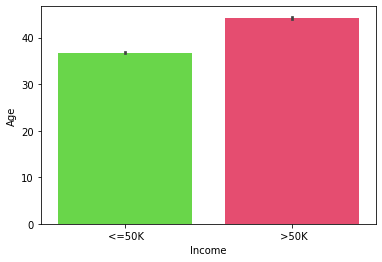

In [21]:
sns.barplot(data=ds, x=ds['Income'],y=ds['Age'],alpha=0.8,palette='prism')
plt.show()

between 10 to 35 GE PERSON Income is <=50k and more that 35 age person income is >50k

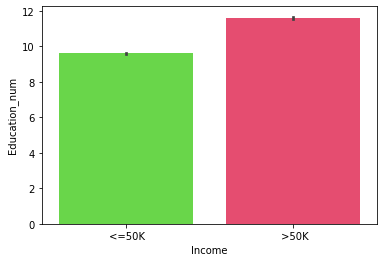

In [22]:
sns.barplot(data=ds, x=ds['Income'],y=ds['Education_num'],alpha=0.8,palette='prism')
plt.show()

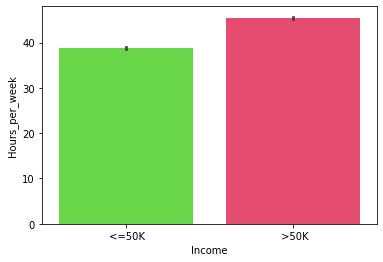

In [23]:
sns.barplot(data=ds, x=ds['Income'],y=ds['Hours_per_week'],alpha=0.8,palette='prism')
plt.show()

<Figure size 1440x1800 with 0 Axes>

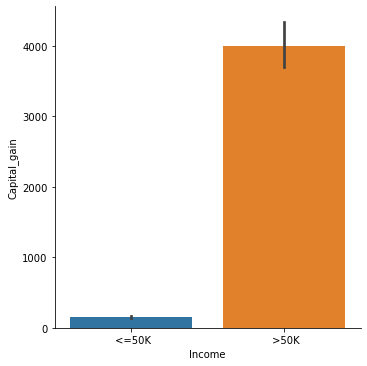

In [24]:
plt.figure(figsize=(20,25))
g=sns.catplot(x='Income',y='Capital_gain',data=ds,kind='bar')

plt.show()

<Figure size 1440x1800 with 0 Axes>

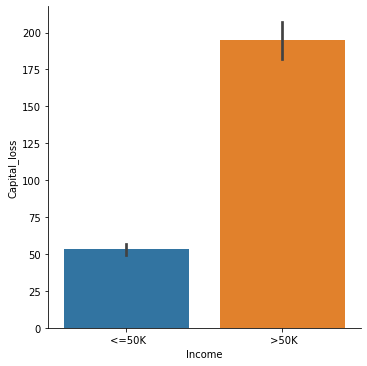

In [25]:
plt.figure(figsize=(20,25))
g=sns.catplot(x='Income',y='Capital_loss',data=ds,kind='bar')

plt.show()

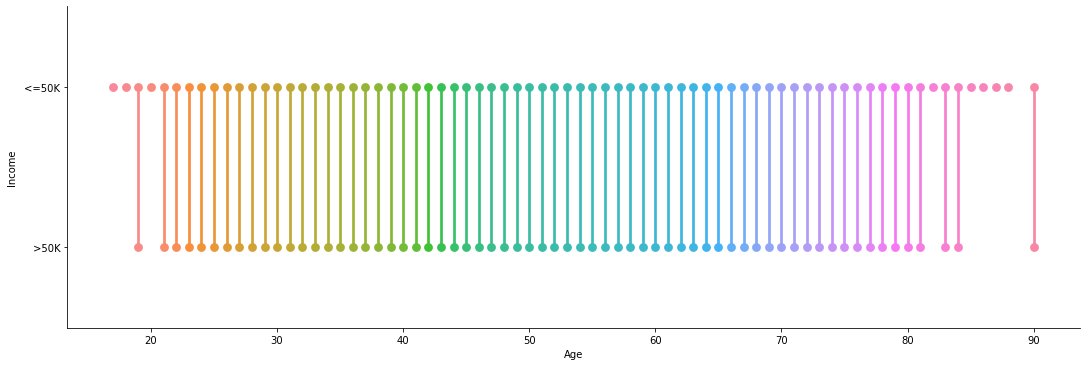

In [26]:
ax=sns.factorplot(x='Age',y='Income',data=ds,hue='Age',aspect=3)

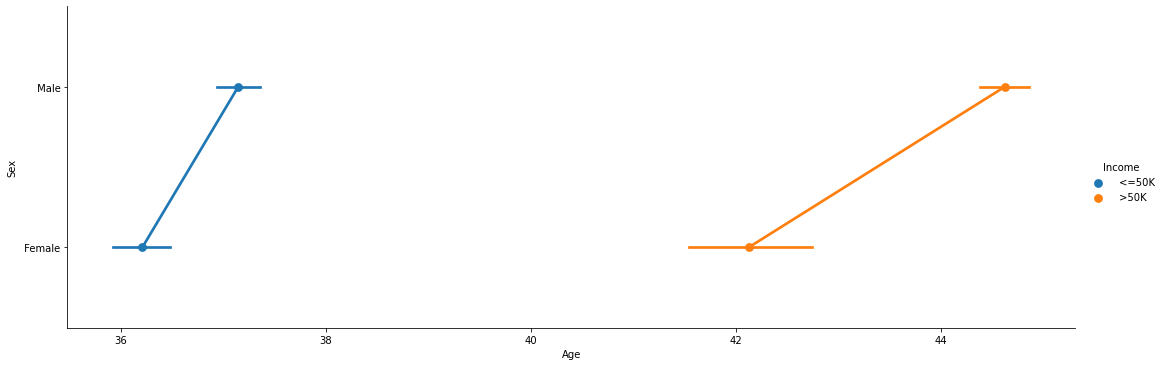

In [27]:
ax=sns.factorplot(x='Age',y='Sex',data=ds,hue='Income',aspect=3)

in this figure we can observe that between 10 to 38 male/female income is <=50k and more that 38age male/female income is >50k

<AxesSubplot:xlabel='Income', ylabel='Age'>

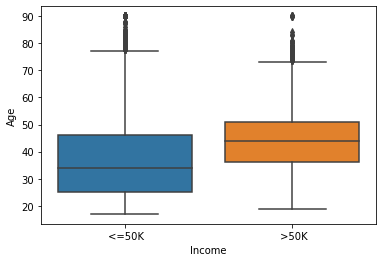

In [28]:
sns.boxplot(x='Income',y='Age',data=ds)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Income'>

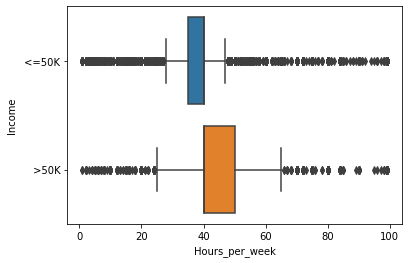

In [29]:
sns.boxplot(x='Hours_per_week',y='Income',data=ds)

<AxesSubplot:xlabel='Income'>

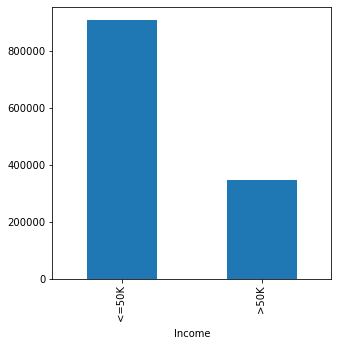

In [30]:
#lets find the income chages across age
ds.groupby('Income')['Age'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(5,5))

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

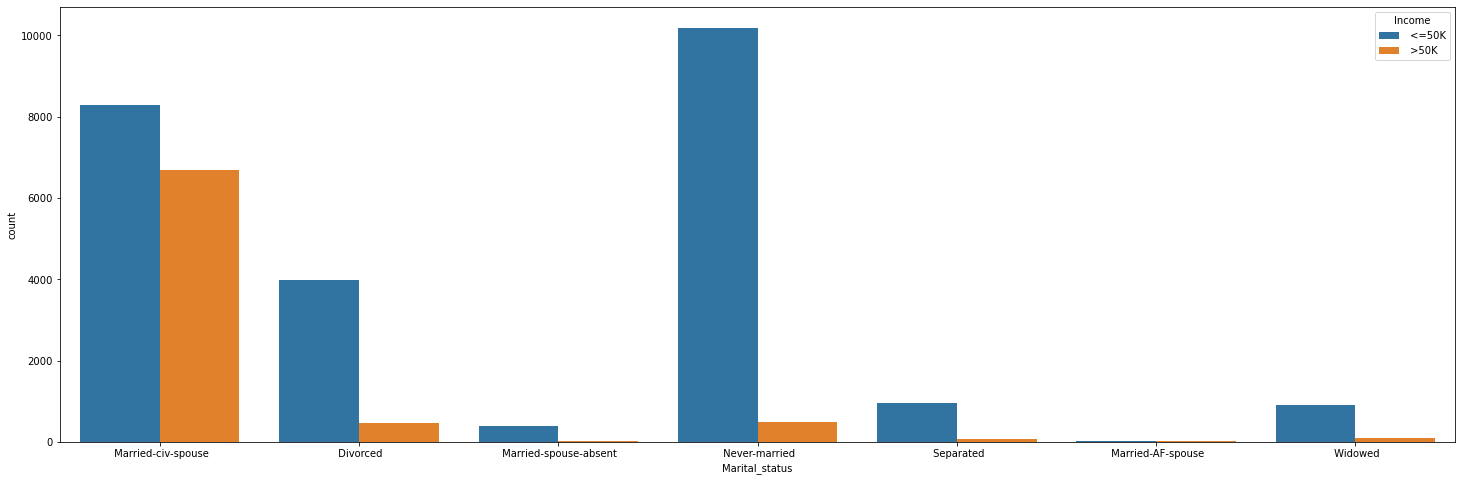

In [31]:
plt.figure(figsize=(25,8))
sns.countplot(ds['Marital_status'],hue=ds.Income)

<AxesSubplot:xlabel='Relationship', ylabel='count'>

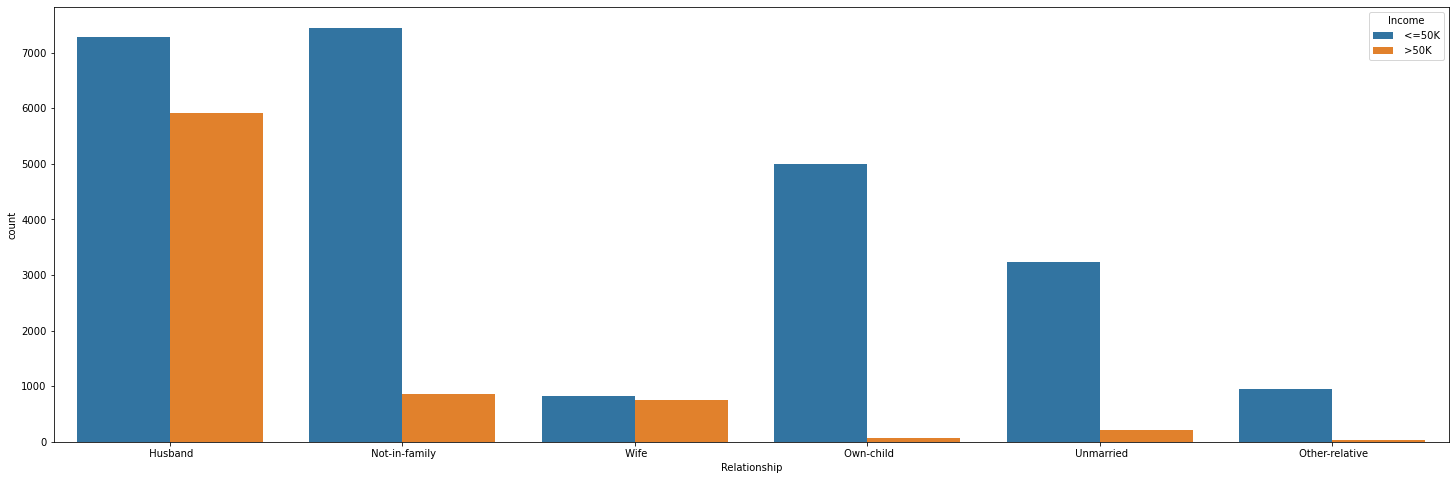

In [32]:
plt.figure(figsize=(25,8))
sns.countplot(ds['Relationship'],hue=ds.Income)

<AxesSubplot:xlabel='Race', ylabel='count'>

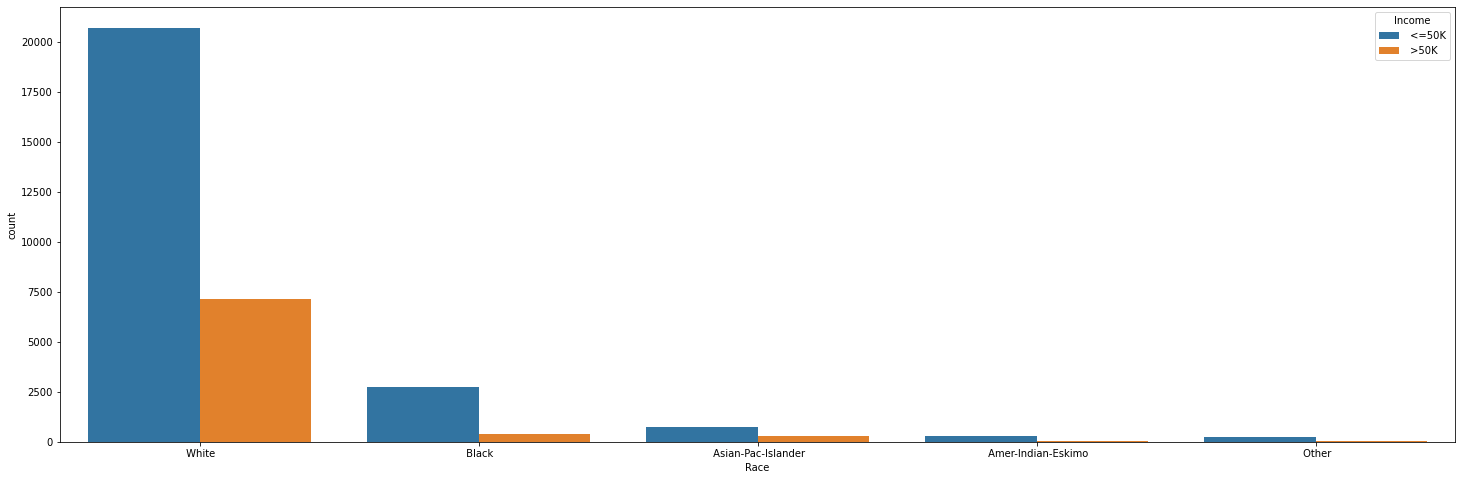

In [33]:
plt.figure(figsize=(25,8))
sns.countplot(ds['Race'],hue=ds.Income)

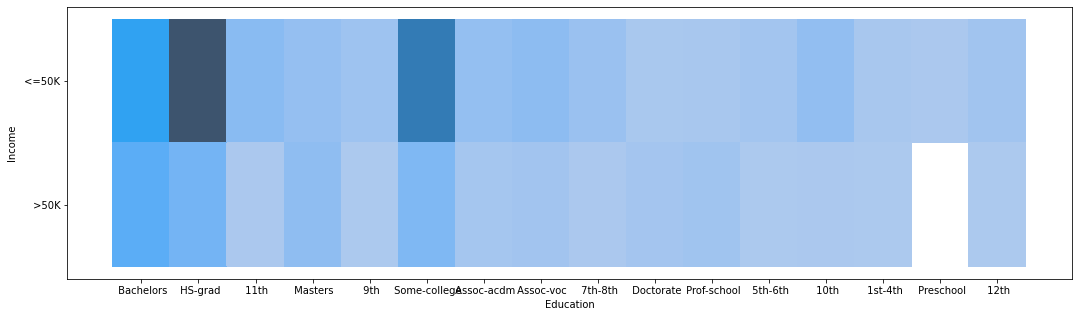

In [34]:
#plotting with figure and x,y, title
plt.figure(figsize=(18,5))
sns.histplot(x='Education', y='Income', data=ds)
plt.show()

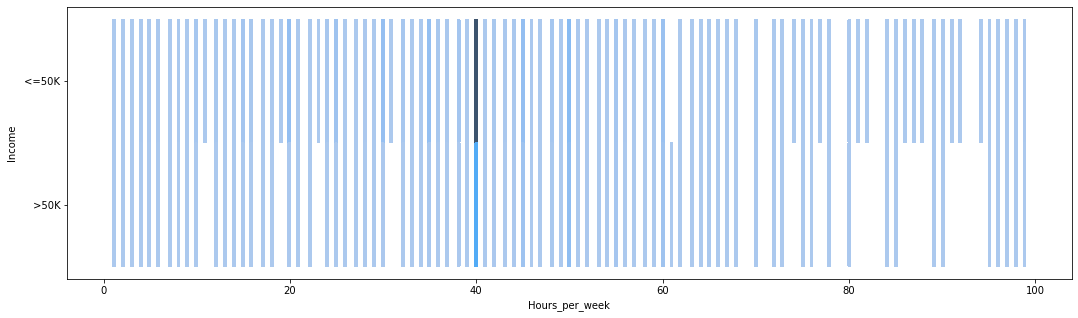

In [35]:
#plotting with figure and x,y, title
plt.figure(figsize=(18,5))
sns.histplot(x='Hours_per_week', y='Income', data=ds)
plt.show()

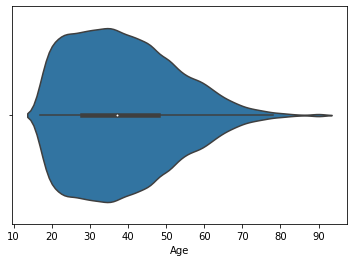

In [36]:
#plotting in violinplot with figure

sns.violinplot(ds['Age'])
plt.show()

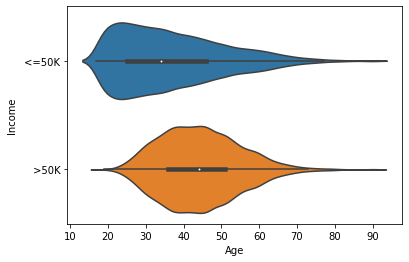

In [37]:
#plotting in violinplot with figure

sns.violinplot(data=ds, x='Age', y='Income')
plt.show()

Before plotting multivariate we need to encode the dataset

# Label Encoder

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
ds.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [40]:
ds.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [41]:
cols=['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Native_country',
       'Income']

In [42]:
le=LabelEncoder()
for data in cols:
    ds[data]=le.fit_transform(ds[data].astype(str))

In [43]:
ds.head(25)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,Bachelors,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,HS-grad,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,11th,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,Bachelors,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,Masters,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,9th,5,3,8,1,2,0,0,0,16,23,0
6,52,6,209642,HS-grad,9,2,4,0,4,1,0,0,45,39,1
7,31,4,45781,Masters,14,4,10,1,4,0,14084,0,50,39,1
8,42,4,159449,Bachelors,13,2,4,0,4,1,5178,0,40,39,1
9,37,4,280464,Some-college,10,2,4,0,2,1,0,0,80,39,1


In [44]:
ds.Income.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

<=50k=0, >50k=1

Dropping Column

We can drop education and Fnlwgt column because there no need of these two columns for income prediction

In [45]:
ds.drop(['Education','Fnlwgt'],axis=1, inplace=True)
ds.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,13,2,4,0,4,1,0,0,13,39,0
1,38,4,9,0,6,1,4,1,0,0,40,39,0
2,53,4,7,2,6,0,2,1,0,0,40,39,0
3,28,4,13,2,10,5,2,0,0,0,40,5,0
4,37,4,14,2,4,5,4,0,0,0,40,39,0


In [46]:
ds.dtypes

Age               int64
Workclass         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

Now we can see that we converted object values into int

# Statistical Apporch

In [47]:
ds.describe()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


checking the correlation of dataset variables

In [48]:
corr=ds.corr()
corr

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Education_num,0.036527,0.052015,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995
Capital_gain,0.077674,0.033828,0.122627,-0.043398,0.025511,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,-0.001984,0.223333
Capital_loss,0.057775,0.012231,0.079932,-0.034182,0.017979,-0.061064,0.018902,0.045572,-0.031614,1.000000,0.054256,0.000420,0.150523


AxesSubplot(0.125,0.125;0.62x0.755)


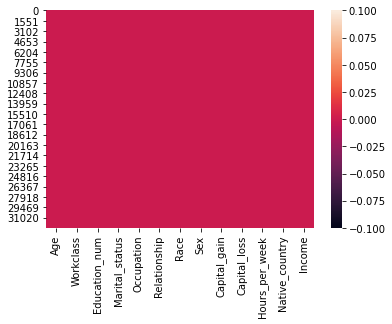

In [49]:
print(sns.heatmap(ds.isnull()))

<AxesSubplot:>

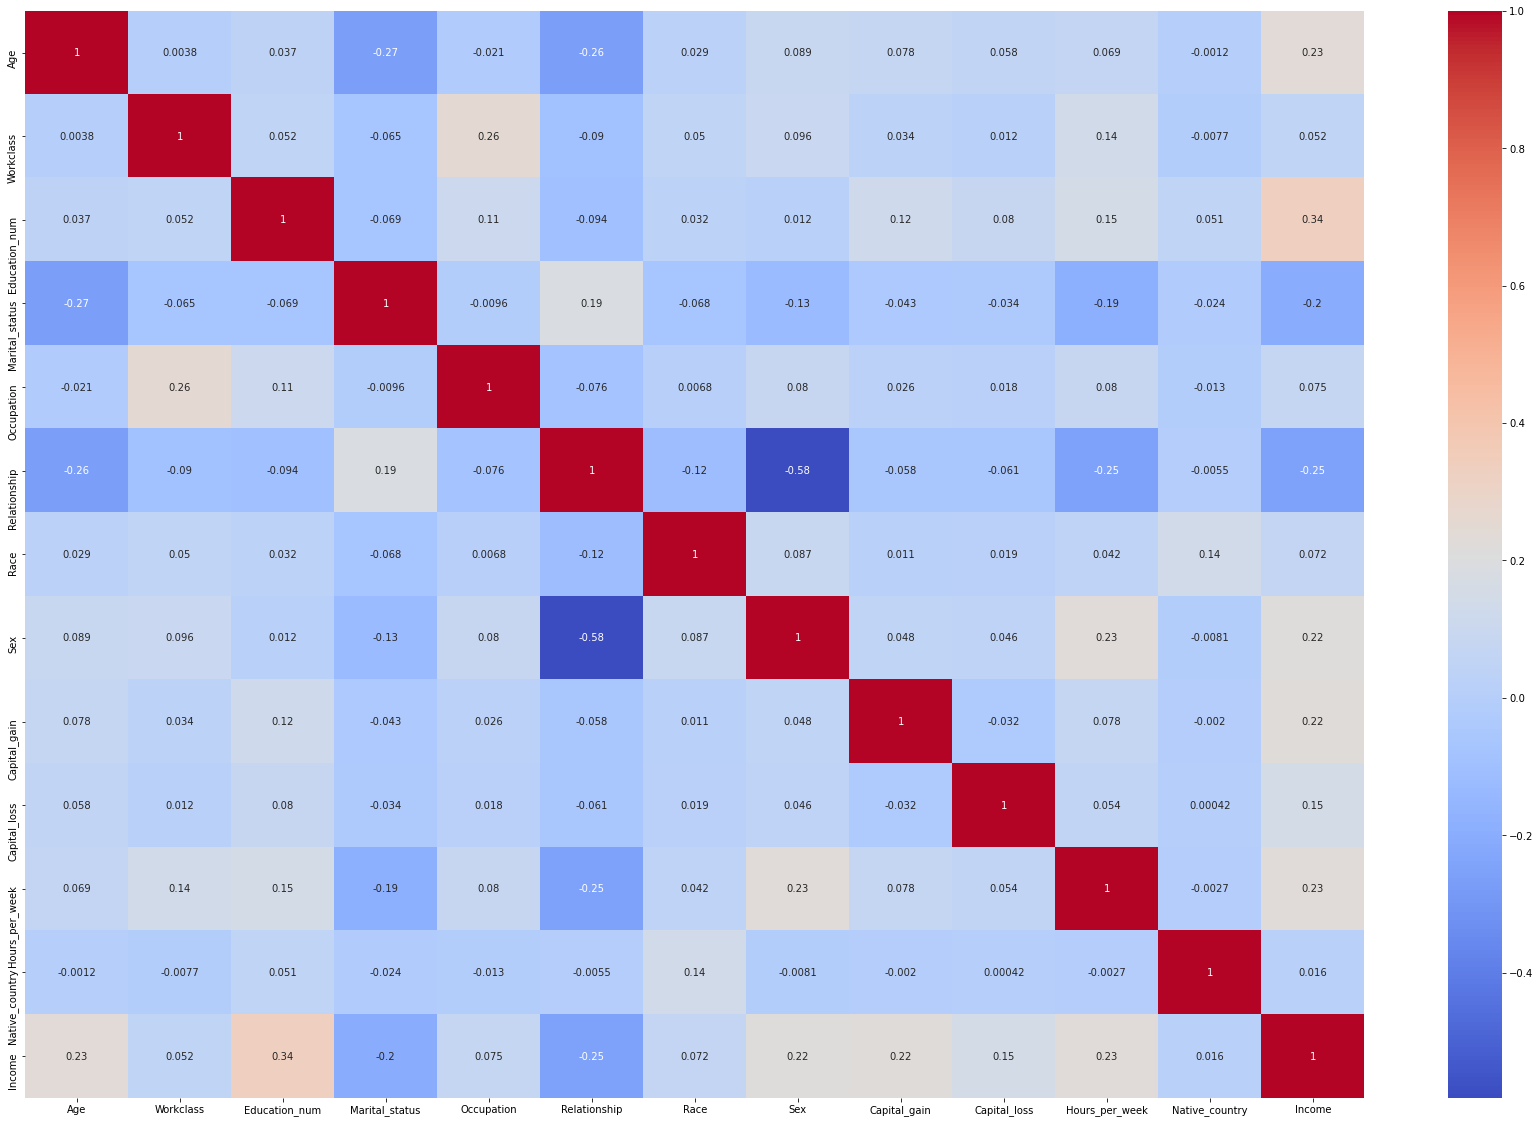

In [50]:
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot=True,cmap='coolwarm')

We are checking correlation by help of heatmap 

In [51]:
#finding unique number, max value, min value of each column in same time
for column in ds.columns:
    print(f"========Column: {column}========")
    print(f"Number of unique values: {ds[column].nunique()}")
    print(f"Max: {ds[column].max()}")
    print(f"Min: {ds[column].min()}")

========Column: Age========
Number of unique values: 73
Max: 90
Min: 17
========Column: Workclass========
Number of unique values: 9
Max: 8
Min: 0
========Column: Education_num========
Number of unique values: 16
Max: 16
Min: 1
========Column: Marital_status========
Number of unique values: 7
Max: 6
Min: 0
========Column: Occupation========
Number of unique values: 15
Max: 14
Min: 0
========Column: Relationship========
Number of unique values: 6
Max: 5
Min: 0
========Column: Race========
Number of unique values: 5
Max: 4
Min: 0
========Column: Sex========
Number of unique values: 2
Max: 1
Min: 0
========Column: Capital_gain========
Number of unique values: 119
Max: 99999
Min: 0
========Column: Capital_loss========
Number of unique values: 92
Max: 4356
Min: 0
========Column: Hours_per_week========
Number of unique values: 94
Max: 99
Min: 1
========Column: Native_country========
Number of unique values: 42
Max: 41
Min: 0
========Column: Income========
Number of unique values: 2
Max: 1
Mi

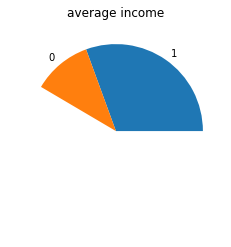

In [52]:
sex=ds['Sex'].value_counts().index
arr=[]
for i in sex:
  x=ds[ds['Sex']==i]
  arr.append(np.mean(x['Income']))
plt.title('average income')
plt.pie(arr,labels=sex)
plt.show()

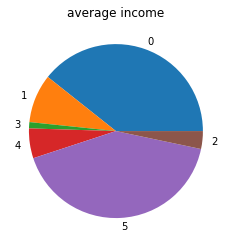

In [53]:
rel=ds['Relationship'].value_counts().index
arr=[]
for i in rel:
  x=ds[ds['Relationship']==i]
  arr.append(np.mean(x['Income']))
plt.title('average income')
plt.pie(arr,labels=rel)
plt.show()

In [54]:
#sns.pairplot(ds)

Plotting Outliers

Age                  AxesSubplot(0.125,0.657941;0.133621x0.222059)
Workclass         AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Education_num      AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Marital_status    AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Occupation        AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Relationship         AxesSubplot(0.125,0.391471;0.133621x0.222059)
Race              AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Sex                AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Capital_gain      AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Capital_loss      AxesSubplot(0.766379,0.391471;0.133621x0.222059)
Hours_per_week          AxesSubplot(0.125,0.125;0.133621x0.222059)
Native_country       AxesSubplot(0.285345,0.125;0.133621x0.222059)
Income                AxesSubplot(0.44569,0.125;0.133621x0.222059)
dtype: object

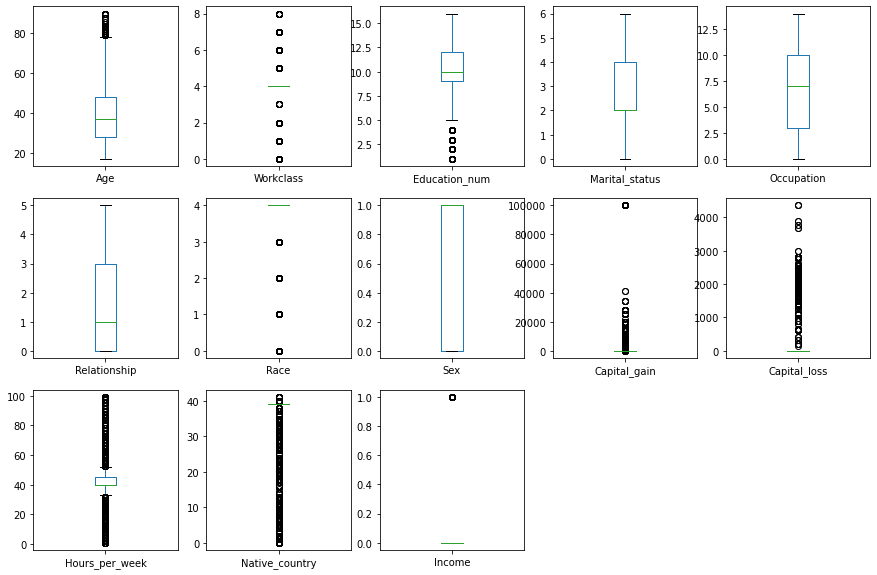

In [55]:
#df.plot
ds.plot(kind='box',subplots=True,layout=(3,5),figsize=(15,10))

here we ca see that in some columns there is outliers so we have to remove this



# Removing Outliers

In [56]:
#Removing the Outliers through IQR method
def removeOutlier(col):
    sorted(col)
    qua1,qua2=col.quantile([0.25,0.75])
    IQR=qua2 - qua1
    lowerRange = qua1- (1.5*IQR)
    upperRange = qua2+(1.5*IQR)
    return lowerRange, upperRange

In [57]:
ds.columns

Index(['Age', 'Workclass', 'Education_num', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [58]:
columns=['Age', 'Workclass', 'Education_num','Race','Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Native_country']
for i in ds[columns]:
    lowScore, highScore= removeOutlier(ds[i])
    ds[i]=np.where(ds[i]>highScore,highScore,ds[i])
    ds[i]=np.where(ds[i]<lowScore,lowScore,ds[i])

Age                  AxesSubplot(0.125,0.657941;0.110714x0.222059)
Workclass         AxesSubplot(0.257857,0.657941;0.110714x0.222059)
Education_num     AxesSubplot(0.390714,0.657941;0.110714x0.222059)
Marital_status    AxesSubplot(0.523571,0.657941;0.110714x0.222059)
Occupation        AxesSubplot(0.656429,0.657941;0.110714x0.222059)
Relationship      AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Race                 AxesSubplot(0.125,0.391471;0.110714x0.222059)
Sex               AxesSubplot(0.257857,0.391471;0.110714x0.222059)
Capital_gain      AxesSubplot(0.390714,0.391471;0.110714x0.222059)
Capital_loss      AxesSubplot(0.523571,0.391471;0.110714x0.222059)
Hours_per_week    AxesSubplot(0.656429,0.391471;0.110714x0.222059)
Native_country    AxesSubplot(0.789286,0.391471;0.110714x0.222059)
Income                  AxesSubplot(0.125,0.125;0.110714x0.222059)
dtype: object

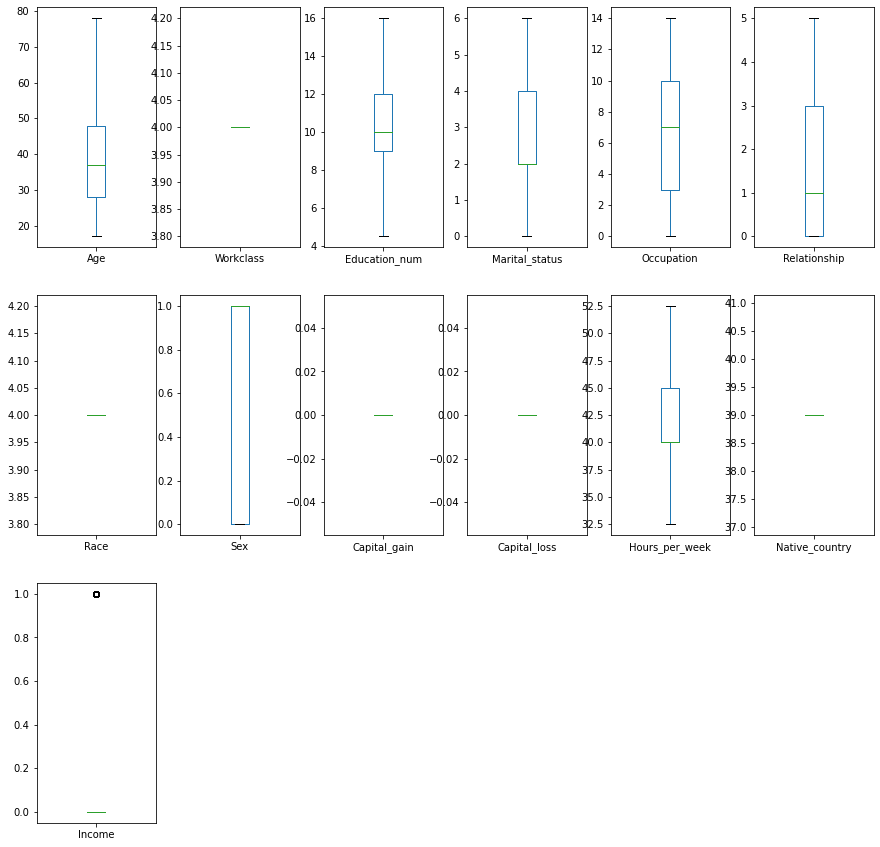

In [59]:
ds.plot(kind='box',subplots=True,layout=(3,6),figsize=(15,15))

# Prepare the data for Predicution and model training

In [60]:
#doing train and test to traing model
#x is the data value and y is the target value
#drop'class' cloumn
x=ds.drop(['Income'], axis=1)
y=ds['Income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25, random_state=42)

print('X train.Shape:',x_train.shape)
print('X test.shape:',x_test.shape)
print('Y train.shape:',y_train.shape)
print('Y test.shape:',y_test.shape)

X train.Shape: (24420, 12)
X test.shape: (8140, 12)
Y train.shape: (24420,)
Y test.shape: (8140,)


We are passing .25% data for test model. Lets chec the accuracy score, confusion metrix and classification score by different different alghorthm

In [61]:
ds.Income.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

# M/C learning models & Predicution of Income

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, cross_val_score

lg=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()


In [65]:
#if we want to do all algoretheme in same for loop

model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(), KNeighborsClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of",m,'is:',accuracy_score(y_test,predm))
    print('\n')
    print('Confusion matrix of',m,'is:')
    print(confusion_matrix(y_test,predm))
    print('\n')
    print('Classification report of',m, 'is:')
    print(classification_report(y_test,predm))
    print('\n')
    print('Cross_val_Score of',m,'is:')
    score=cross_val_score(lg, x, y, cv=5)
    print('\n')
    print(score)
    print('\n')
    print("Score_Mean:", score.mean())
    print('\n')
    print('************************************************************************')
    

Accuracy score of LogisticRegression() is: 0.7995085995085995


Confusion matrix of LogisticRegression() is:
[[5707  450]
 [1182  801]]


Classification report of LogisticRegression() is:
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      6157
           1       0.64      0.40      0.50      1983

    accuracy                           0.80      8140
   macro avg       0.73      0.67      0.69      8140
weighted avg       0.78      0.80      0.78      8140



Cross_val_Score of LogisticRegression() is:


[0.80159705 0.80543612 0.80727887 0.80528256 0.80574324]


Score_Mean: 0.8050675675675676


************************************************************************
Accuracy score of GaussianNB() is: 0.783046683046683


Confusion matrix of GaussianNB() is:
[[5041 1116]
 [ 650 1333]]


Classification report of GaussianNB() is:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      6157


Observation: we can find that RandomForestClassifier given the best accuracy score- 0.8042997542997543 so we can save our model from RFC.

In [66]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("Predicted value:",pred)
print("actual value:",y_test)

Predicted value: [0 0 1 ... 0 0 1]
actual value: 14160    0
27047    0
28867    1
5667     1
7827     0
        ..
30175    0
30745    0
29400    1
27264    0
30338    1
Name: Income, Length: 8140, dtype: int32


predict value of income of a person <=50k and >50k,  <=50k=0, >50k=1

In [67]:
#using the GridSearch for hyper parameter tuning 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


grid_param = { "criterion": ["gini","entropy"]}

gd_sr =GridSearchCV(estimator= dtc, param_grid=grid_param,scoring="accuracy", cv=5) #defaut scoring ="accuracy"
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

# in Decision tree gini get the best result (which is default)

{'criterion': 'entropy'}
0.7846437346437346


In [68]:
# changing random_state and n_estimators to get more accuracy
rf = RandomForestClassifier(n_estimators=500,random_state=37)
#RandomForenstClassifier(100)---Default
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8057739557739557
[[5470  687]
 [ 894 1089]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      6157
           1       0.61      0.55      0.58      1983

    accuracy                           0.81      8140
   macro avg       0.74      0.72      0.73      8140
weighted avg       0.80      0.81      0.80      8140



we got the best hypertunning parameter with Randomforest model

Now we found that we got best Accuracy Score, HyperParameter Tunning score and Cross Validation Score with Random Forest Classifier so we can save our model with RandomFOrestClassifier.

# file saving

In [69]:
#Saving Random Forest Classifier
import joblib
#saving the file as object file using joblib
joblib.dump(rf,"Census_income_final.obj")

['Census_income_final.obj']

In [70]:
Census_income_final=joblib.load("Census_income_final.obj")
Census_income_final.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0])